<a href="https://colab.research.google.com/github/Aditi840/Guvi-Tasks/blob/main/Logistic_Regression_Assignment12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Social_Network_Ads.csv

This dataset contains information of users in a social network. Those informations are the user id the gender the age and the estimated salary. A car company has just launched their brand new luxury SUV. And we're trying to see which of these users of the social network are going to buy this brand new SUV And the last column here tells If yes or no the user bought this SUV we are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables which are going to be the age and the estimated salary. So our matrix of feature is only going to be these two columns. We want to find some correlations between the age and the estimated salary of a user and his decision to purchase yes or no the SUV.


**Step 1 | Data Pre-Processing**

**Importing the Libraries**

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

**Importing the dataset**

In [2]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
print(df)
print(df.columns)
print(df.isnull())

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]
Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')
     User ID  Gender    Age  EstimatedSalary  Purchased
0      False   False  False            False      False
1      False   False  False            False      False
2      False   False  False            False      False
3      F

**Splitting the dataset into the Training set and Test set**

In [4]:
df = pd.get_dummies(df, columns=['Gender'])
print(df)

      User ID  Age  EstimatedSalary  Purchased  Gender_Female  Gender_Male
0    15624510   19            19000          0              0            1
1    15810944   35            20000          0              0            1
2    15668575   26            43000          0              1            0
3    15603246   27            57000          0              1            0
4    15804002   19            76000          0              0            1
..        ...  ...              ...        ...            ...          ...
395  15691863   46            41000          1              1            0
396  15706071   51            23000          1              0            1
397  15654296   50            20000          1              1            0
398  15755018   36            33000          0              0            1
399  15594041   49            36000          1              1            0

[400 rows x 6 columns]


In [5]:
# Splitting the dataset into the Training set and Test set
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Feature Scaling**

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Step 2 | Logistic Regression Model**

The library for this job which is going to be the linear model library and it is called linear because the logistic regression is a linear classifier which means that here since we're in two dimensions, our two categories of users are going to be separated by a straight line. Then import the logistic regression class. Next we will create a new object from this class which is going to be our classifier that we are going to fit on our training set.

**Fitting Logistic Regression to the Training set**

In [9]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

**Step 3 | Predection**

In [12]:
# Predict the test set results
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1]


**Step 4 | Evaluating The Predection**

We predicted the test results and now we will evaluate if our logistic regression model learned and understood correctly. So this confusion matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.

**Making the Confusion Matrix**

In [14]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

[[57  1]
 [ 5 17]]


**Visualization**

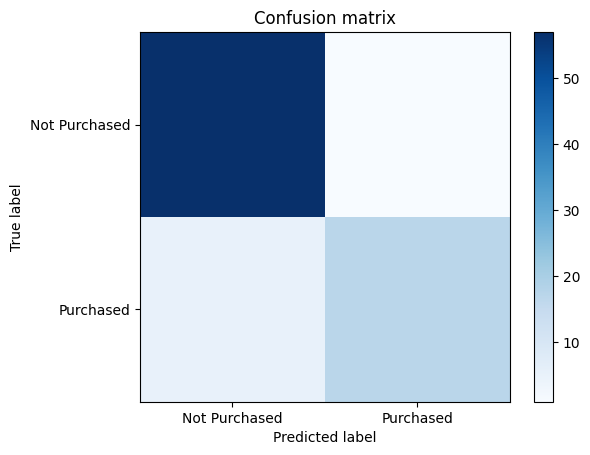

In [22]:
# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.xticks([0, 1], ['Not Purchased', 'Purchased'])
plt.yticks([0, 1], ['Not Purchased', 'Purchased'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()